# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 4. Questions revisited
#### 5. Hypotheses

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path
path='C:/Users/Juliana/Documents/DATA ANALYTICS COURSE/IMMERSION/6'

In [13]:
# Import data
df = pd.read_csv(os.path.join(path,'02 Data','Merged Data', 'merged_data_complete.csv'))

### 2. Data Cleaning and Deriving Variables

In [14]:
df.shape

(20843, 14)

In [15]:
df.columns

Index(['Unnamed: 0', 'Year', 'Event_type', 'Event_Category', 'Country',
       'Country_Code', 'Region', 'Continent', 'Number_of_Events',
       'Temperature_Change', 'Net_Migration', 'Population', 'Carbon_Emissions',
       'Energy_Consumption'],
      dtype='object')

In [16]:
# Remove unnecessary or irrelevant columns
df=df.drop(columns = ['Unnamed: 0'])

In [17]:
df.head()

,Year,Event_type,Event_Category,Country,Country_Code,Region,Continent,Number_of_Events,Temperature_Change,Net_Migration,Population,Carbon_Emissions,Energy_Consumption
0,1965,Geophysical,Earthquake,Indonesia,IDN,South-Eastern Asia,Asia,1.0,-0.190500,-61146.0,100267062.0,24689.911,84.51602
1,1965,Hydrological,Landslide,Argentina,ARG,South America,Americas,1.0,0.045583,33973.0,22159650.0,58866.351,328.52762
2,1965,Meteorological,Storm,Bangladesh,BGD,Southern Asia,Asia,3.0,-0.199833,47618.0,55385112.0,19974.149,NaN
3,1965,Hydrological,Landslide,Bulgaria,BGR,Eastern Europe,Europe,1.0,-0.382333,1838.0,8204168.0,46317.877,119.92565
4,1965,Meteorological,Storm,Bahamas (the),BHS,Caribbean,Americas,1.0,-0.014917,2493.0,140059.0,1316.453,NaN


#### Duplicates Check:

In [18]:
# Find duplicates

df_dups = df[df.duplicated()]

In [19]:
df_dups.shape # No duplicates!

(0, 13)

### 3. Exploring Relationships

### Correlations:

In [20]:
# Create a correlation matrix using pandas

df.corr(numeric_only=True)

,Year,Number_of_Events,Temperature_Change,Net_Migration,Population,Carbon_Emissions,Energy_Consumption
Year,1.000000,0.206423,0.709102,-0.022216,0.057864,0.062510,0.032819
Number_of_Events,0.206423,1.000000,0.125146,0.064754,0.080988,0.115996,0.304676
Temperature_Change,0.709102,0.125146,1.000000,0.047394,0.037116,0.089793,0.076630
Net_Migration,-0.022216,0.064754,0.047394,1.000000,-0.433092,-0.032278,0.379087
Population,0.057864,0.080988,0.037116,-0.433092,1.000000,0.844530,0.604033
Carbon_Emissions,0.062510,0.115996,0.089793,-0.032278,0.844530,1.000000,0.985878
Energy_Consumption,0.032819,0.304676,0.076630,0.379087,0.604033,0.985878,1.000000


#### Create a correlation matrix heatmap

In [21]:
df.columns

Index(['Year', 'Event_type', 'Event_Category', 'Country', 'Country_Code',
       'Region', 'Continent', 'Number_of_Events', 'Temperature_Change',
       'Net_Migration', 'Population', 'Carbon_Emissions',
       'Energy_Consumption'],
      dtype='object')

In [22]:
# Create a subset

subset = df[['Year', 'Number_of_Events',
       'Temperature_Change', 'Net_Migration',
       'Population', 'Carbon_Emissions', 'Energy_Consumption',]]

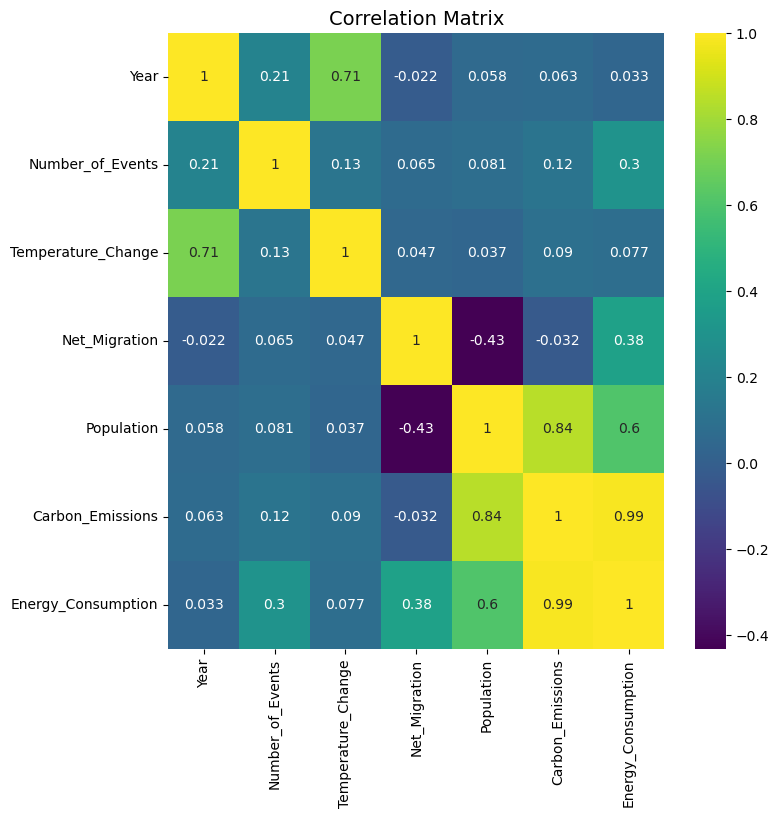

In [23]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(8, 8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(subset.corr(numeric_only=True), annot=True, ax=ax,cmap='viridis') 

# add title
plt.title('Correlation Matrix', fontsize=14)  
plt.show()  

Comments:


2. The positive correlations between carbon emissions, energy consumption,  population, and the number of events (0.62, 0.6, and 0.67, respectively)  implies that countries with higher populations, carbon emissions, and energy consumption are more prone to natural events.

3. Both carbon emissions and energy consumption have moderate positive correlations (0.31 and 0.38, respectively) with net migration, which means countries with higher carbon emissions and energy consumption tend to experience elevated net migration.

4. As expected, carbon emissions and energy consumption exhibit a strong positive correlation (0.98). Regions with higher carbon emissions also tend to have higher energy consumption.

6. Temp_Change_AVG shows a positive correlation (0.54) with Year, indicating an increase in temperature change over the years.

7. Year displays a weak positive correlation with the Number_of_Events (0.21), suggesting a slight rise in the number of events over the years.

### Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships

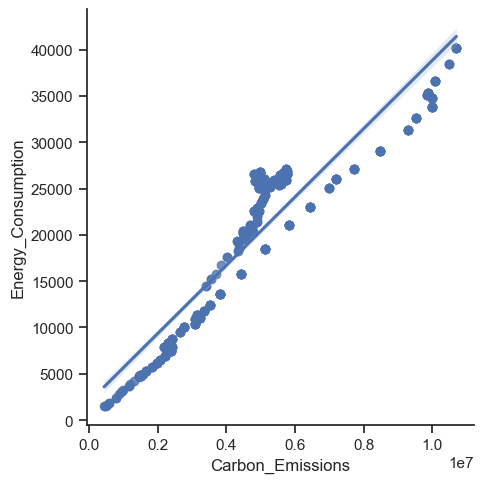

In [55]:
# Create a scatterplot for the "Carbon_Emissions" and "Energy_Consumption" columns in seaborn

sns.lmplot(x = 'Carbon_Emissions', y = 'Energy_Consumption', data = df_China_USA)

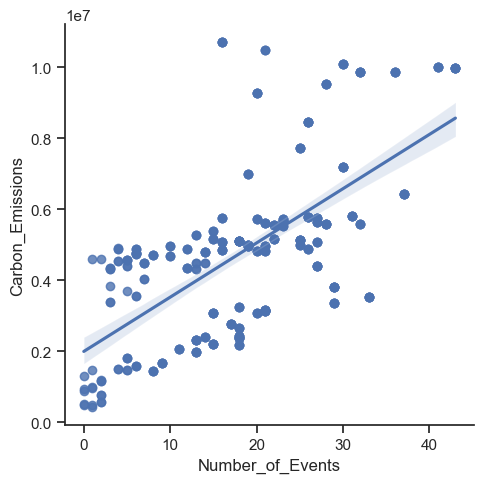

In [56]:
# Create a scatterplot for the "Number_of_Events" and "Carbon_emissions" columns in seaborn

sns.lmplot(x = 'Number_of_Events', y = 'Carbon_Emissions', data = df_China_USA)

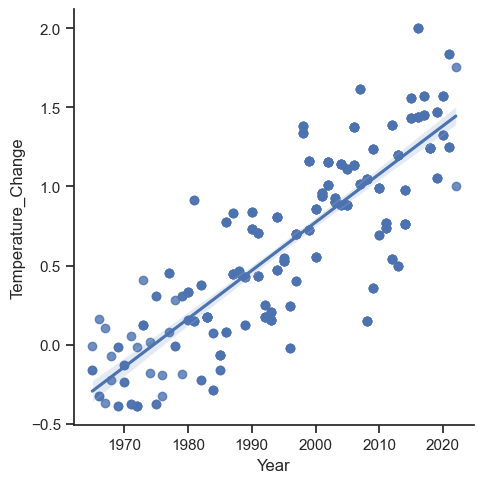

In [57]:
# Create a scatterplot for the "Year" and "Temperature_Change" columns in seaborn

sns.lmplot(x = 'Year', y = 'Temperature_Change', data = df_China_USA)

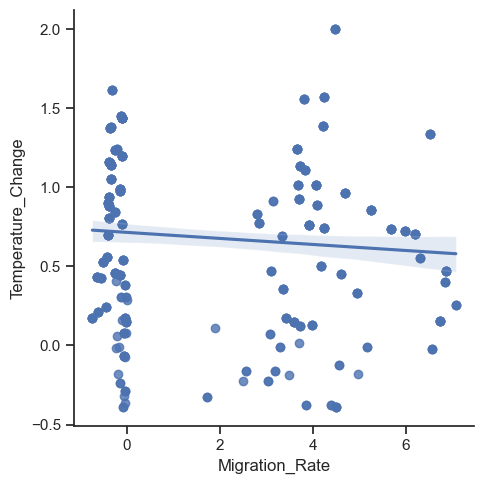

In [58]:
# Create a scatterplot for the "Net_Migration" and "Temp_Change_AVG" columns in seaborn

sns.lmplot(x = 'Migration_Rate', y = 'Temperature_Change', data = df_China_USA)

### Pair Plots:

In [24]:
df.columns

Index(['Year', 'Event_type', 'Event_Category', 'Country', 'Country_Code',
       'Region', 'Continent', 'Number_of_Events', 'Temperature_Change',
       'Net_Migration', 'Population', 'Migration_Rate', 'Carbon_Emissions',
       'Energy_Consumption', 'EmissionsPC', 'EnergyPC'],
      dtype='object')

In [61]:
# Keep only the variables you want to use in the pair plot

sub_2 = df_China_USA[['Year', 'Number_of_Events', 'Temperature_Change',
       'Net_Migration', 'Population', 'Migration_Rate', 'Carbon_Emissions',
       'Energy_Consumption', 'EmissionsPC', 'EnergyPC']]

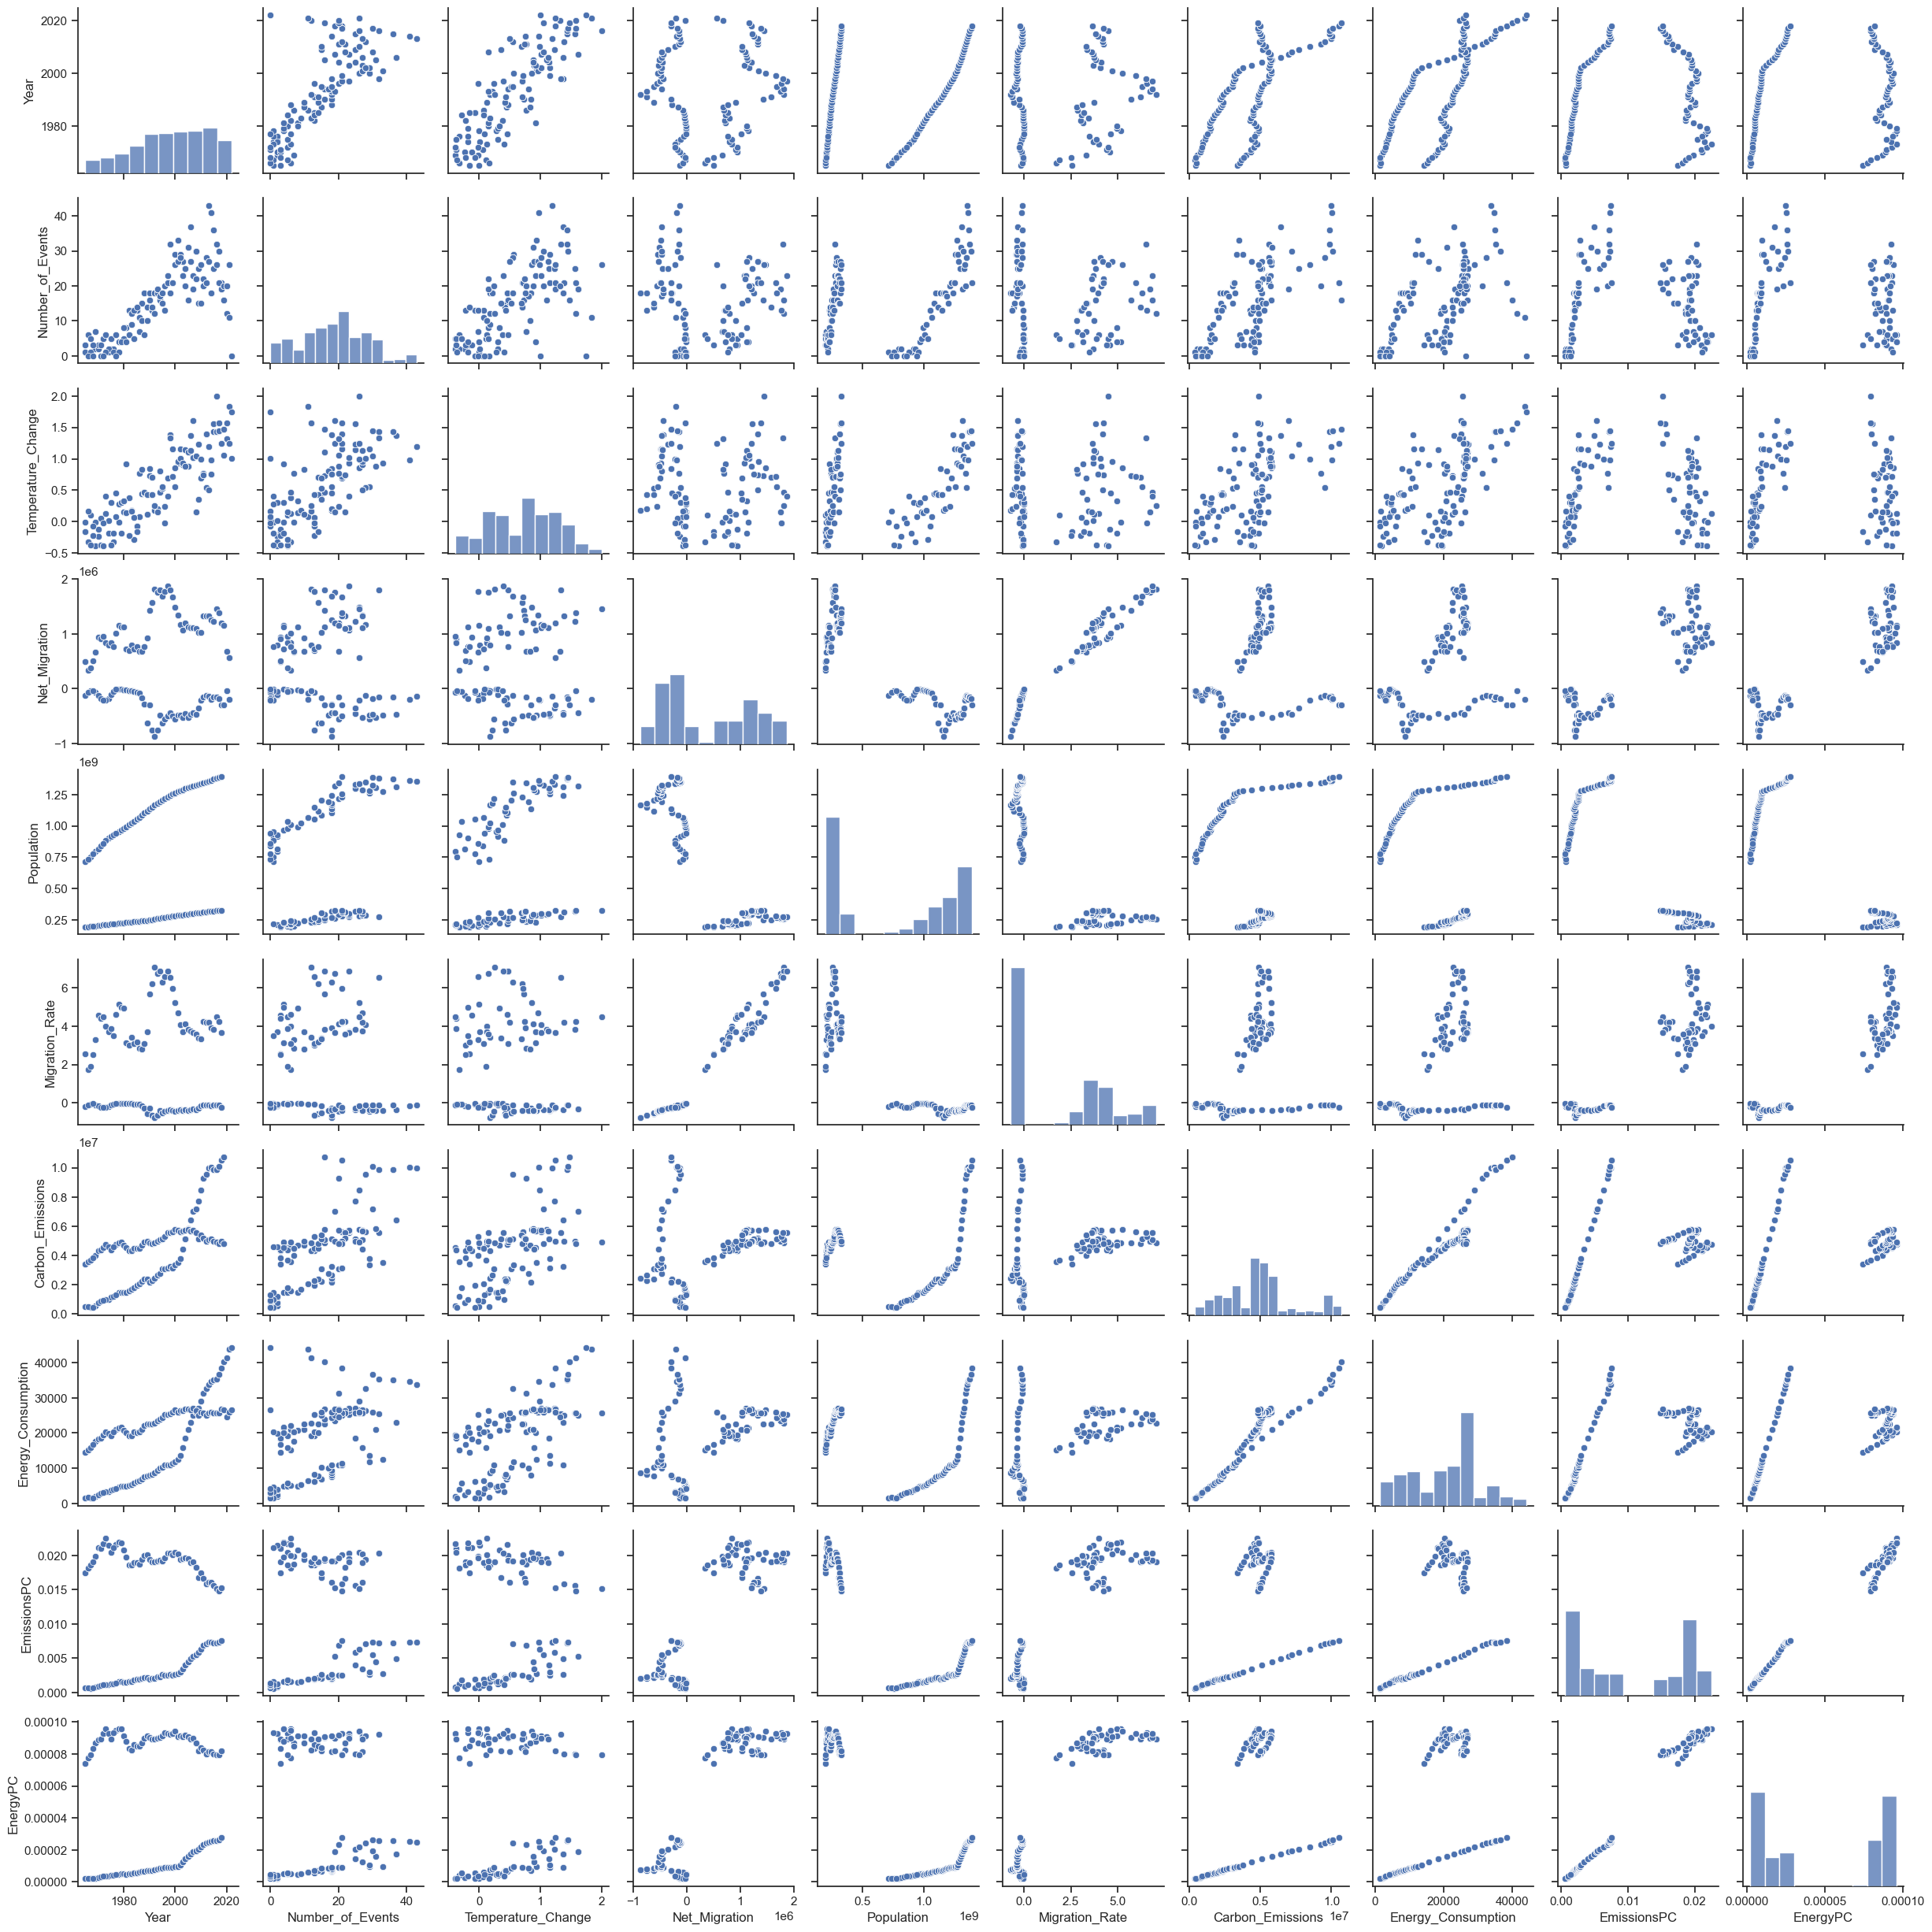

In [62]:
# Create a pair plot 

g = sns.pairplot(sub_2)

Comment:
1. Over the years, the occurrence of natural disasters has increased, accompanied by a rise in temperature changes. 
2. Over time, emigration numbers have varied; in some periods, migration rates were higher and prevalent, while in more recent years, emigration numbers appear to have increased.
3. Certain countries,exhibit a drastic rise in energy consumption and subsequent carbon emissions overtime. This trend is evident through distinct lines deviating from the rest in the plot. The same observation applies when considering population data.
4. As anticipated, there is a nearly linear relationship between carbon emissions and energy consumption.




### Catogorical variables:

<Axes: xlabel='Continent', ylabel='Count'>

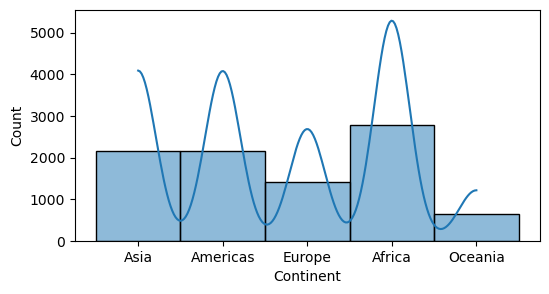

In [23]:
# Create a histogram to visualize the distribution of the Continent variable

# Create the histogram plot
plt.figure(figsize=(6, 3))

sns.histplot(df['Continent'], bins = 5, kde = True)

### Year vs Temp_Change_AVG

In [27]:
df.columns

Index(['Year', 'Event_type', 'Event_Category', 'Country', 'Country_Code',
       'Region', 'Continent', 'Number_of_Events', 'Temperature_Change',
       'Net_Migration', 'Population', 'Migration_Rate', 'Carbon_Emissions',
       'Energy_Consumption', 'EmissionsPC', 'EnergyPC'],
      dtype='object')

In [28]:
#"Define custom colors for each continent to ensure consistency across the plots."
continent_colors = {
    'Americas': '#FF9933',  
    'Asia': '#4C72B0',       
    'Europe': '#55A868',   
    'Africa': '#C44E52',    
    'Oceania': '#8172B2'}

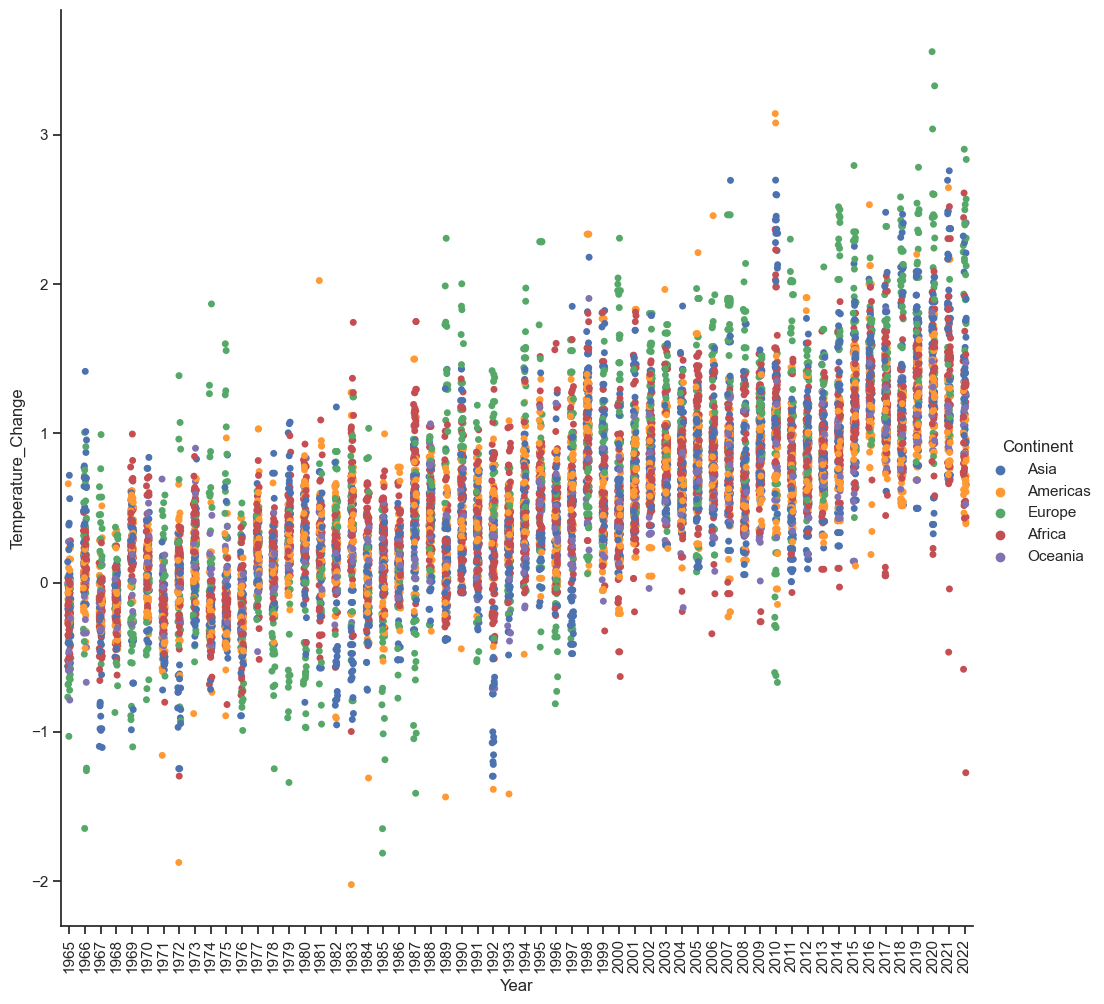

In [29]:
# Create a categorical plot for Temperature Change per Year using Continent as a category

sns.set(style="ticks")
g = sns.catplot(x="Year", y="Temperature_Change", hue="Continent", data=df,height=10, aspect=1,palette=continent_colors)
# Rotate x-axis labels by 90 degrees
g.set_axis_labels("Year", "Temperature_Change")
g.set_xticklabels(rotation=90)

### Year vs Net_Migration

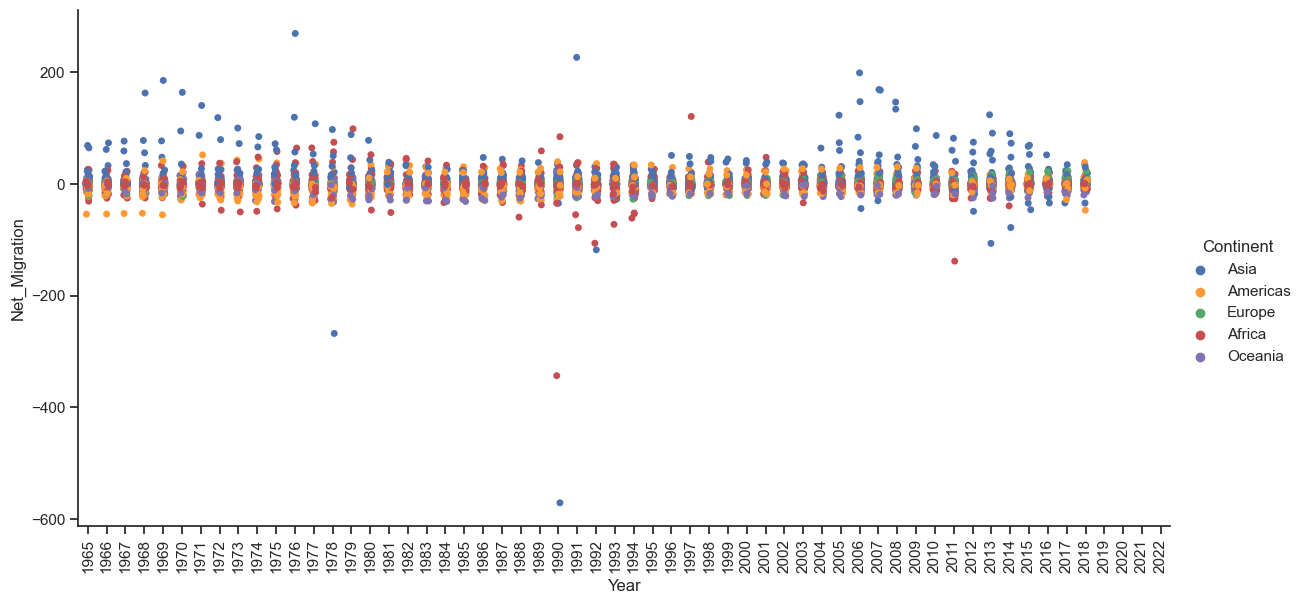

In [30]:
# Create a categorical plot for Net_Migration per Year using Continent as a category

sns.set(style="ticks")
g = sns.catplot(x="Year", y="Migration_Rate", hue="Continent", data=df,height=6, aspect=2,palette=continent_colors)
# Rotate x-axis labels by 90 degrees
g.set_axis_labels("Year", "Net_Migration")
g.set_xticklabels(rotation=90)

### Year vs Number_of_Events

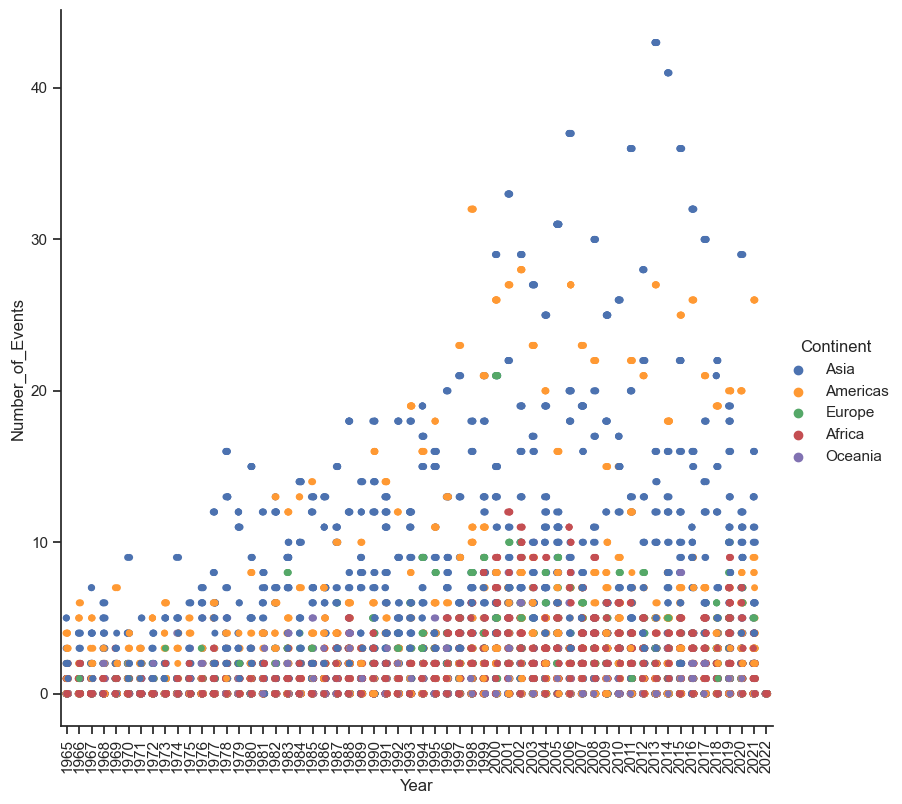

In [31]:
# Create a categorical plot for Number_of_Events per Year using Continent as a category

sns.set(style="ticks")
g = sns.catplot(x="Year", y="Number_of_Events", hue="Continent", data=df,height=8, aspect=1,palette=continent_colors)
# Rotate x-axis labels by 90 degrees
g.set_axis_labels("Year", "Number_of_Events")
g.set_xticklabels(rotation=90)

Comment: From the plots above, it can be seen that Europe is the continent experiencing the most extreme temperature changes throughout. However, it is Asia that is facing the highest number of natural disasters.


### Year vs Carbon_Emissions

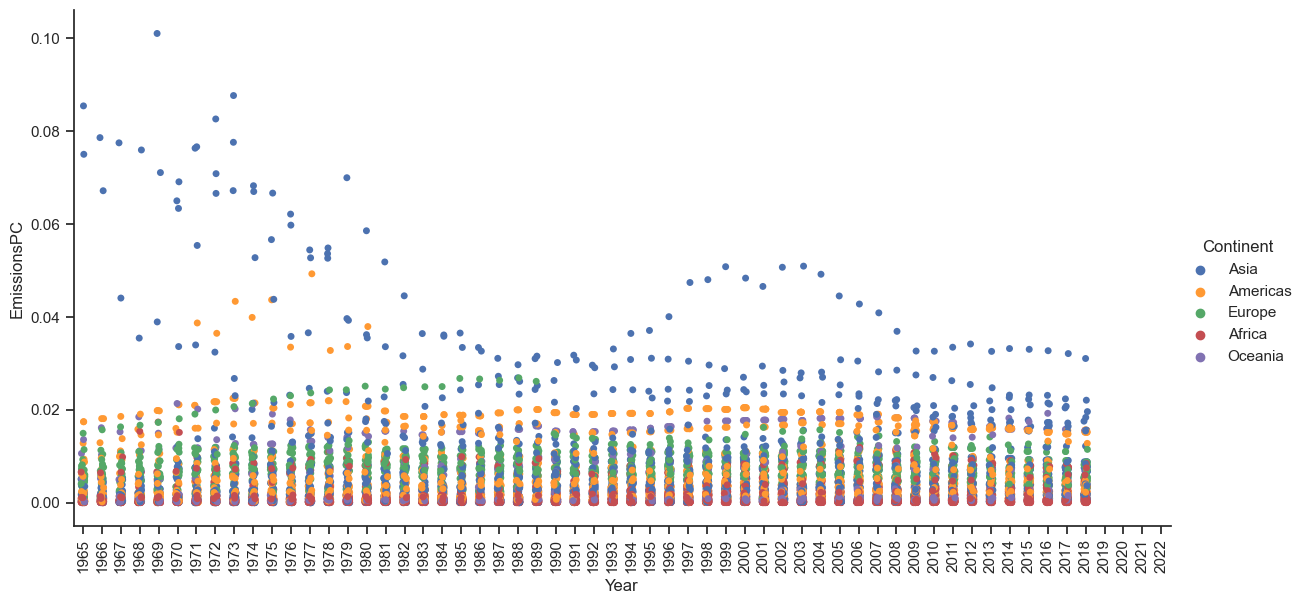

In [33]:
# Create a categorical plot for Carbon_Emissions Change per Year using Continent as a category

sns.set(style="ticks")
g = sns.catplot(x="Year", y="EmissionsPC", hue="Continent", data=df,height=6, aspect=2,palette=continent_colors)
# Rotate x-axis labels by 45 degrees
g.set_axis_labels("Year", "EmissionsPC")
g.set_xticklabels(rotation=90)


#### Year vs Energy_Consumption

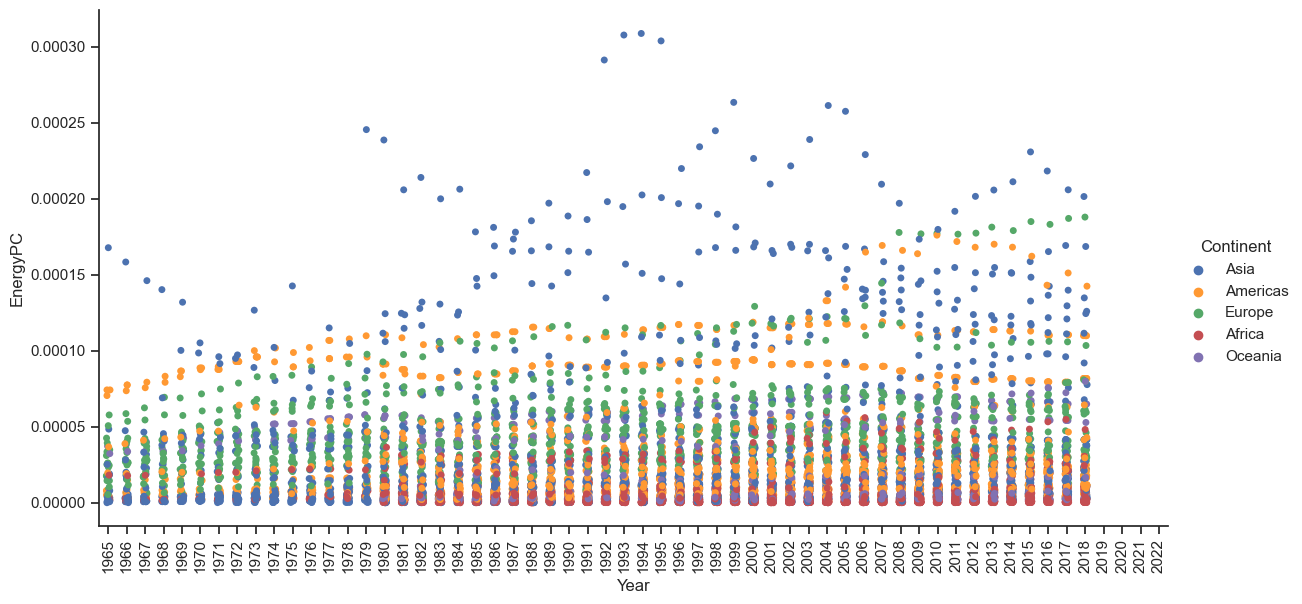

In [36]:
# Create a categorical plot for Energy_Consumption Change per Year using Continent as a category

sns.set(style="ticks")
g = sns.catplot(x="Year", y="EnergyPC", hue="Continent", data=df,height=6, aspect=2,palette=continent_colors)
# Rotate x-axis labels by 45 degrees
g.set_axis_labels("Year", "EnergyPC")
g.set_xticklabels(rotation=90)


Comment: Asia and the Americas are the continents that have experienced the highest number of natural disasters, with Asia being the most affected. This aligns with their carbon emission and energy consumption figures, as they appear to be the leading continents in both categories. In the plot representing the relationship between years and energy consumption per continent, two countries, one from Asia and one from the Americas, consistently exhibit exceptional values year after year. It would be interesting to identify these countries and conduct a more in-depth analysis of their data.

#### Number of Events vs Net_Migration

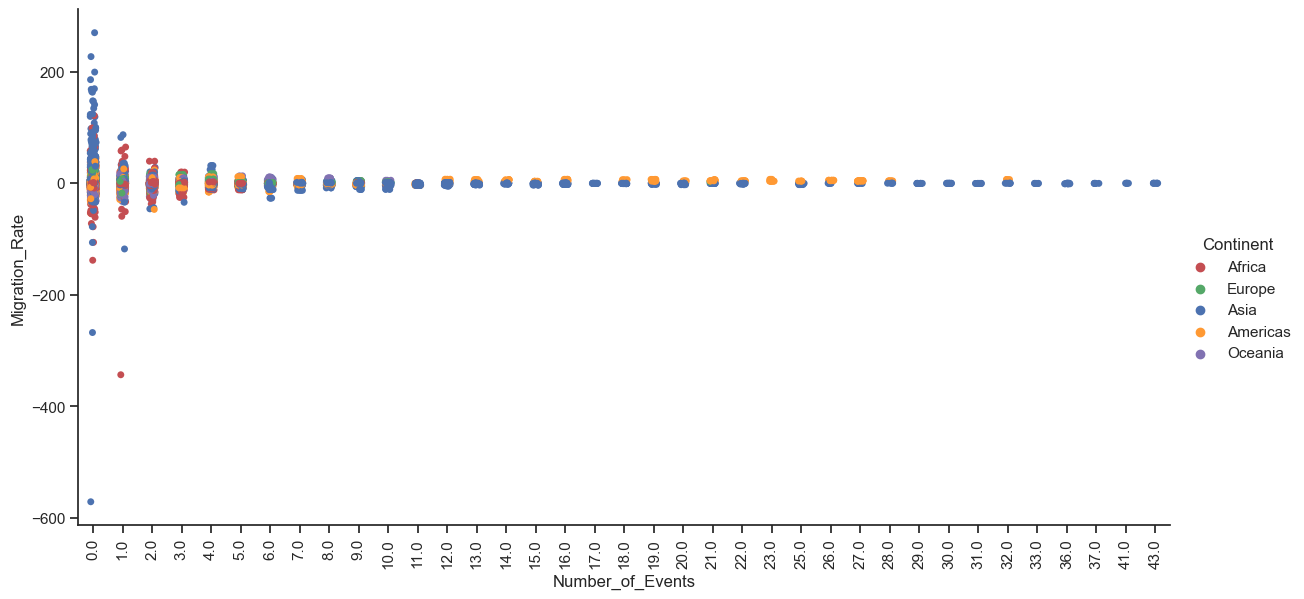

In [37]:
# Create a categorical plot for Number_of_Events and Net_Migration using Continent as a category
sns.set(style="ticks")
g = sns.catplot(x="Number_of_Events", y="Migration_Rate", hue="Continent", data=df,height=6, aspect=2,palette=continent_colors)
# Rotate x-axis labels by 90 degrees
g.set_axis_labels("Number_of_Events", "Migration_Rate")
g.set_xticklabels(rotation=90)

#### Net_Migration vs Natural_Disaster_Frequency

In [38]:
#Categorize the Natural_Disaster_Frequency per year
df.loc[df['Number_of_Events'] ==0, 'Natural_Disaster_Frequency'] = 'Very Low'
df.loc[(df['Number_of_Events'] > 1) & (df['Number_of_Events'] <= 5), 'Natural_Disaster_Frequency'] = 'Low'
df.loc[(df['Number_of_Events'] > 5) & (df['Number_of_Events'] <= 10), 'Natural_Disaster_Frequency'] = 'Moderate' 
df.loc[(df['Number_of_Events'] > 10) & (df['Number_of_Events'] <= 15), 'Natural_Disaster_Frequency'] = 'High' 
df.loc[df['Number_of_Events'] > 15, 'Natural_Disaster_Frequency'] = 'Very High'

In [39]:
df['Natural_Disaster_Frequency'].value_counts()

Very Low     4674
Low          3956
Moderate     1143
Very High     465
High          369
Name: Natural_Disaster_Frequency, dtype: int64

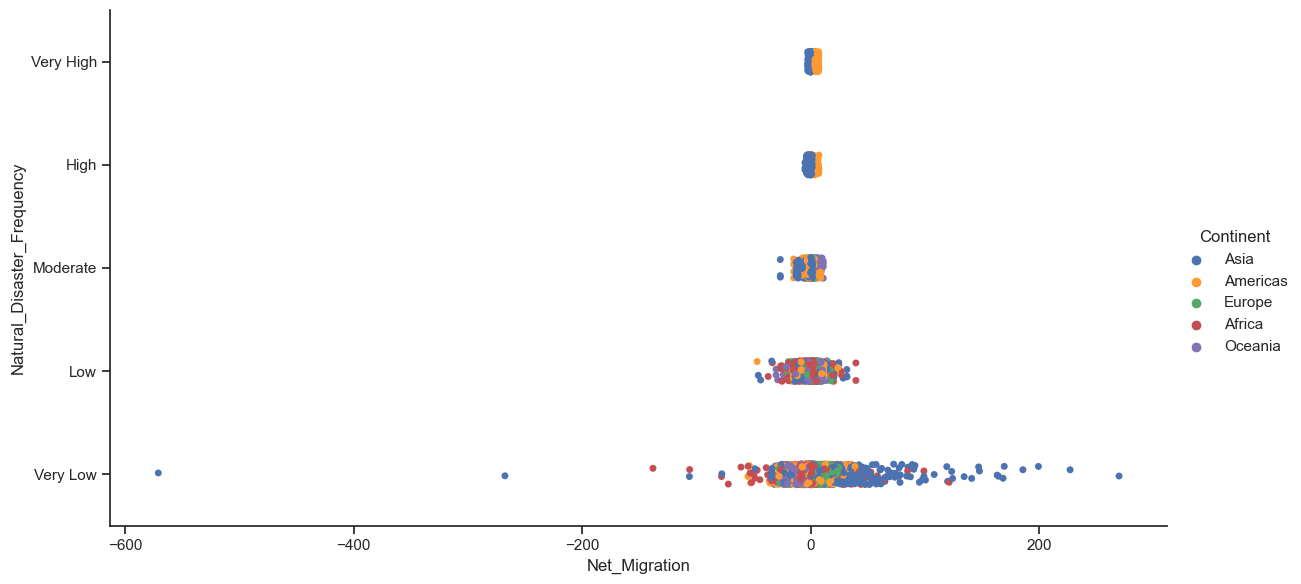

In [40]:
# Create a categorical plot for Number_of_Events and Net_Migration using Continent as a category
sns.set(style="ticks")
# Specify the desired order of categories for the y-axis
order = ['Very High', 'High','Moderate',  'Low','Very Low']
# Create the categorical plot with the specified order
g = sns.catplot(x="Migration_Rate", y="Natural_Disaster_Frequency", hue="Continent", data=df,height=6, aspect=2,order=order,palette=continent_colors)
# Rotate x-axis labels by 90 degrees
g.set_axis_labels("Net_Migration", "Natural_Disaster_Frequency")


#### Net_Migration vs Temperature_Change

In [41]:
#Categorize the average temperature change
df.loc[df['Temperature_Change'] <= 0.5, 'Temperature_Change_Cat'] = 'Minimal Change'
df.loc[(df['Temperature_Change'] > 0.5) & (df['Temperature_Change'] <= 1), 'Temperature_Change_Cat'] = 'Moderate Change'
df.loc[(df['Temperature_Change'] > 1) & (df['Temperature_Change'] <= 1.5), 'Temperature_Change_Cat'] = 'Significant Change'
df.loc[df['Temperature_Change'] > 1.5, 'Temperature_Change_Cat'] = 'Severe Change'

In [42]:
df['Temperature_Change_Cat'].value_counts()

Minimal Change        5769
Moderate Change       3730
Significant Change    2158
Severe Change          806
Name: Temperature_Change_Cat, dtype: int64

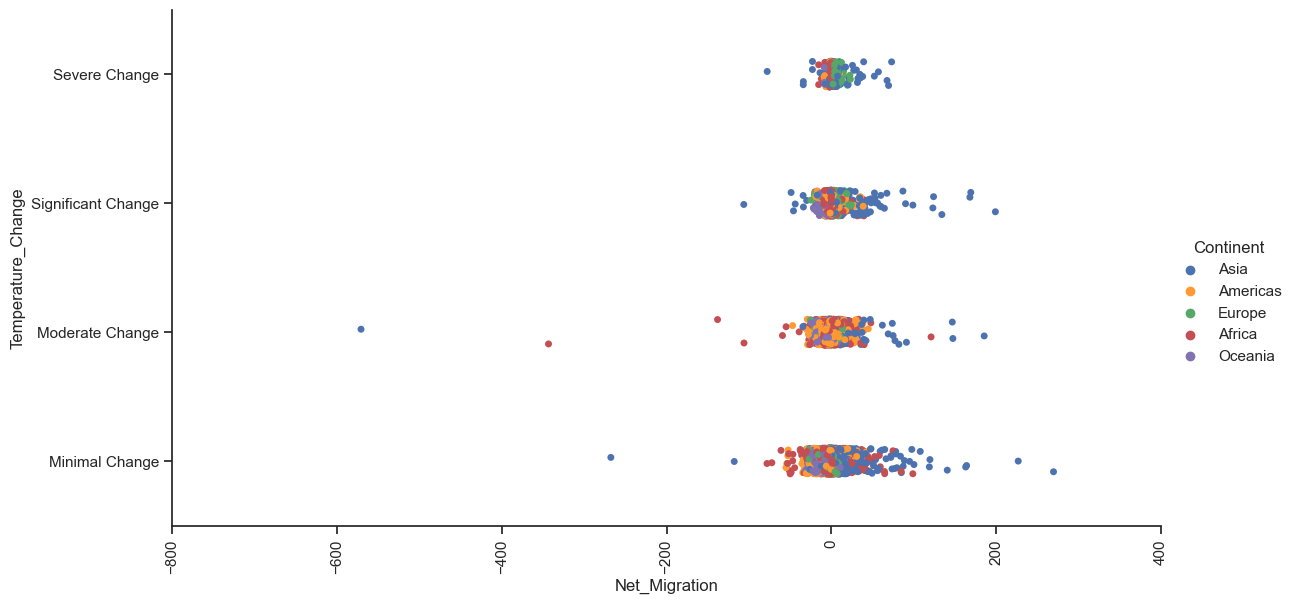

In [44]:
#  Create a categorical plot for Net_Migration and Temp_Change_AVG using Continent as a category

sns.set(style="ticks")
# Specify the desired order of categories for the y-axis
order = ['Severe Change', 'Significant Change','Moderate Change','Minimal Change']

g = sns.catplot(x="Migration_Rate", y="Temperature_Change_Cat", hue="Continent", data=df,height=6, aspect=2,order=order,palette=continent_colors)

# Rotate x-axis labels by 90 degrees
g.set_axis_labels("Net_Migration", "Temperature_Change")
g.set_xticklabels(rotation=90)

Comment: Migration predominantly happens in countries experiencing moderate and significant temperature changes (from 0.5 to 2 degrees Celsius). 

### 4. Questions revisited

- How have natural disasters influenced migration patterns in affected countries? 
The Americas stand out as a region experiencing high migration rates, even in years with very high frequencies of disasters. Negative migration is more common in countries and during years with moderate to very low natural disaster frequencies. This suggests that while natural disasters play a role in migration patterns, other factors such as temperature changes and regional disparities also contribute significantly.

- Which specific areas globally are experiencing the most significant impact from climate change, and does this align with their levels of greenhouse gas emissions and energy expenditure?
Asia and the Americas are the continents that have experienced the highest number of natural disasters, with Asia being the most affected. This aligns with their carbon emission and energy consumption figures, as these continents appear to lead in both categories.

- Is there a correlation between changes in temperatures, the frequency of natural disasters, and higher CO2 emissions in certain regions? 
Europe is the continent experiencing the most extreme temperature changes throughout the entire period under study. However, it is Asia that has faced the highest number of natural disasters. Asia and the Americas have had the highest numbers of events per year.


### 5. Hypotheses

1. Regions with moderate to high frequencies of natural disasters are more likely to experience notable migration patterns, 
2. Changes in temperature alone may not be the sole driving factor behind shifts in migration patterns
3. High carbon emissions and energy consumption may not directly impact local temperature changes